# run_car

In [1]:
import datetime
import numpy as np
import random

In [2]:
from cars.world import SimpleCarWorld
from cars.agent import SimpleCarAgent
from cars.physics import SimplePhysics
from cars.track import generate_map

# базовый пример кода
```
if filename:
    agent = SimpleCarAgent.from_file(filename)
    w = SimpleCarWorld(1, m, SimplePhysics, SimpleCarAgent, timedelta=0.2)
    if evaluate:
        print(w.evaluate_agent(agent, steps))
    else:
        w.set_agents([agent])
        w.run(steps)
else:
    w = SimpleCarWorld(1, m, SimplePhysics, SimpleCarAgent, timedelta=0.2)
    w.run(steps)
```

In [3]:
def create_map(seed, agent):
    np.random.seed(seed)
    random.seed(seed)
    m = generate_map(8, 5, 3, 3)
    w = SimpleCarWorld([agent], m, SimplePhysics, None, timedelta=0.2)
    return w

# Агент

In [4]:
random.seed(42)
np.random.seed(42)
agent = SimpleCarAgent(name="Ivan")

Пример `agent = SimpleCarAgent.from_file('network_config_agent_0_layers_9_6_1.txt')`

# Параметры

In [5]:
map_seeds = [23, 15, 21, 42]

# Нарабатываем данные

In [6]:
from tqdm import tqdm_notebook

In [7]:
agent.RANDOM_ACTION_P = 1.0
map_seed = map_seeds[0]
print("train on map = {}".format(map_seed))

# Меняем карту
w = create_map(seed=map_seed, agent=agent)

# Учимся
w.run(steps=tqdm_notebook(range(2000)), visual=False, save=False)


train on map = 23



In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ivkir\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


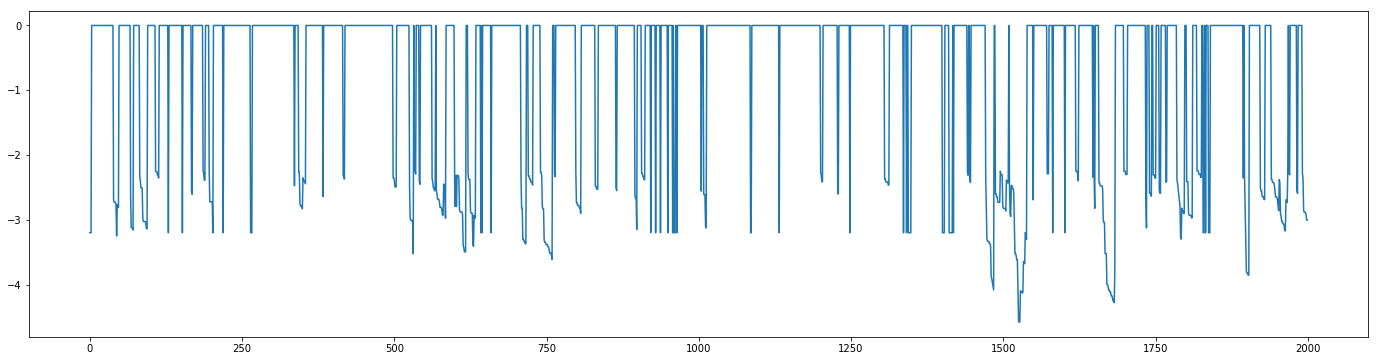

In [11]:
figsize(24, 6)
plot(agent.reward_clean_history)

# Учим модель

In [ ]:
for rap, steps in train_params:
    agent.RANDOM_ACTION_P = rap

    for map_seed in map_seeds:
        print("train on map = {}".format(map_seed))

        # Меняем карту
        w = create_map(seed=map_seed, agent=agent)

        # Учимся
        w.run(steps=steps, visual=False)

        # чистим историю: не учимся повторно на старой карте, ускоряемся
        agent.clear_history()
        #learn_plot.clear()

# Оцениваем

In [ ]:
print("- time = {}, train_params = {}".format(datetime.datetime.now(), train_params))

for map_seed in map_seeds:
    # Меняем карту
    w = create_map(seed=map_seed, agent=agent)
    
    # оцениваем
    revard = w.evaluate_agent(agent, steps=800, visual=False)
    print("  - evaluate_agent on map = {}, reward = {}".format(map_seed, revard))

- time = 2018-01-25 23:48:09.524151, train_params = [(0.4, 2000), (0.2, 2000)]
  - evaluate_agent on map = 23, reward = -0.9642339247654708
  - evaluate_agent on map = 15, reward = -2.5192296993670387
  - evaluate_agent on map = 21, reward = -2.8168753875083836
  - evaluate_agent on map = 42, reward = -2.9760000000000004
- time = 2018-01-25 22:30:17.445186, train_params = [(0.4, 1000), (0.2, 1000)]
  - evaluate_agent on map = 23, reward = -1.0748786753725963
  - evaluate_agent on map = 15, reward = -0.7286997971342467
  - evaluate_agent on map = 21, reward = -0.8760332330883187
  - evaluate_agent on map = 42, reward = -0.7286153210942956
- time = 2018-01-24 00:37:51.303347, train_params = [(0.2, 1000)]
  - evaluate_agent on map = 23, reward = -1.7741872447429086
  - evaluate_agent on map = 15, reward = -1.5800781959803243
  - evaluate_agent on map = 21, reward = -0.8135290975234429
  - evaluate_agent on map = 42, reward = -1.7857630295989895


# Смотрим вживую и продолжаем учиться

In [ ]:
agent.RANDOM_ACTION_P = 0.00

for map_seed in map_seeds[:1]:
    print("train on map = {}".format(map_seed))

    # Меняем карту
    w = create_map(seed=map_seed, agent=agent)

    # Учимся
    w.run(steps=None, visual=True)

In [ ]:
# чистим историю: не учимся повторно на старой карте, ускоряемся
agent.clear_history()

# Немного покатаемся для отладки

In [ ]:
for map_seed in map_seeds:
    # Меняем карту
    w = create_map(seed=map_seed, agent=agent)
    
    # оцениваем
    revard = w.evaluate_agent(agent, steps=200, visual=True)
    print("evaluate_agent on map = {}, reward = {}".format(map_seed, revard))

# Debug

In [ ]:
agent = w.agents[0]

In [ ]:
np.concatenate([
    np.array(agent.sensor_data_history)[:,:1],
    np.array(agent.chosen_actions_history),
    np.array(agent.reward_history).reshape(-1,1)
], axis=1)

In [ ]:
agent.RANDOM_ACTION_P